In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

<h1>CSV 파일 불러오기</h1>

In [3]:
#데이터셋 불러오기
df = pd.read_csv("C:/DeepLearning/datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5,1,'Label')

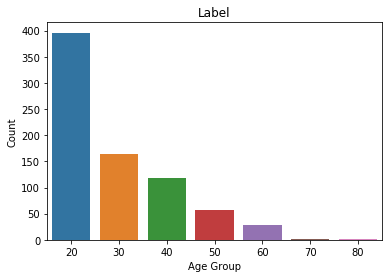

In [5]:
# Age를 10으로 나누어서 새로운 열 생성
df['Age_group'] = (df['Age'] // 10) * 10

# countplot 그리기
sns.countplot(data=df, x="Age_group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Label")

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group
0,6,148,72,35,0,33.6,0.627,50,1,50
1,1,85,66,29,0,26.6,0.351,31,0,30
2,8,183,64,0,0,23.3,0.672,32,1,30
3,1,89,66,23,94,28.1,0.167,21,0,20
4,0,137,40,35,168,43.1,2.288,33,1,30
5,5,116,74,0,0,25.6,0.201,30,0,30
6,3,78,50,32,88,31.0,0.248,26,1,20
7,10,115,0,0,0,35.3,0.134,29,0,20
8,2,197,70,45,543,30.5,0.158,53,1,50
9,8,125,96,0,0,0.0,0.232,54,1,50


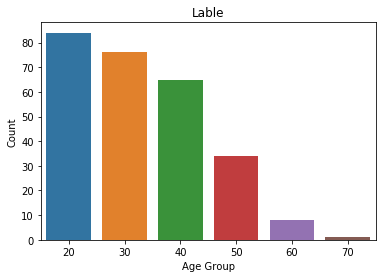

In [7]:
# 나이 그룹 별 Outcome 확인

# outCome이 1인 데이터 그룹 생성
df_outcome_1 = df[df['Outcome'] == 1]

# 나이 그룹 별 Outcome이 1인 countplot 그리기
sns.countplot(data=df_outcome_1, x='Age_group')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title('Lable')
plt.show()

In [8]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_group                   0
dtype: int64

In [9]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_group                   0
dtype: int64

In [10]:
#OutCome을 제외한 입력 데이터
X=df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_group
0,6,148,72,35,0,33.6,0.627,50,50
1,1,85,66,29,0,26.6,0.351,31,30
2,8,183,64,0,0,23.3,0.672,32,30
3,1,89,66,23,94,28.1,0.167,21,20
4,0,137,40,35,168,43.1,2.288,33,30


In [11]:
#OutCome Label
y=df['Outcome']
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<h1>1. Classifier Machine Learning (Outcome) </h1>

In [15]:
from sklearn.model_selection import train_test_split

#학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_group
603,7,150,78,29,126,35.2,0.692,54,50
118,4,97,60,23,0,28.2,0.443,22,20
247,0,165,90,33,680,52.3,0.427,23,20
157,1,109,56,21,135,25.2,0.833,23,20
468,8,120,0,0,0,30.0,0.183,38,30
193,11,135,0,0,0,52.3,0.578,40,40
306,10,161,68,23,132,25.5,0.326,47,40
319,6,194,78,0,0,23.5,0.129,59,50
97,1,71,48,18,76,20.4,0.323,22,20
530,2,122,60,18,106,29.8,0.717,22,20


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings # 필터 오류를 무시
warnings.filterwarnings('ignore')

<h1 style="font-weight:normal"> Support vector machine(SVM) </h1>

In [14]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
#학습
clf_svm.fit(X_train, y_train)

#테스트값을 pred_svm에 저장
pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_svm)))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.69481
[[107   0]
 [ 47   0]]


<h1 style="font-weight:normal">LogisticRegression(LR)</h1>

In [154]:
from sklearn.linear_model import LogisticRegression

# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)

#학습
clf_lr.fit(X_train, y_train)

#테스트값을 pred_lr에 저장
pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
#print (accuracy_score(y_test, pred_lr))
print('{:.5f}'.format(accuracy_score(y_test, pred_lr)))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.81169
[[97 10]
 [19 28]]


<h1 style="font-weight:normal">RandomForest(RF)</h1>

In [155]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)

#학습
rf_clf.fit(X_train, y_train)

#테스트값을 pred_rf에 저장
pred_rf = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_rf)))
print (confusion_matrix(y_test, pred_rf))


--- Radom Forest ---
0.75974
[[87 20]
 [17 30]]


<h1 style="font-weight:normal">DecisionTree(DT)</h1>

In [156]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)

#학습
clf_dt.fit(X_train, y_train)

#테스트값을 pred_dt에 저장
pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_dt)))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.79870
[[89 18]
 [13 34]]


<h1 style="font-weight:normal">K-NearestNeighbor(KNN)</h1>

In [157]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#모델 선택 (분류 문제인 경우)
knn_model = KNeighborsClassifier(n_neighbors=5)
#회귀 문제인 경우/ KNeighborsRegressor() /

#모델 학습
knn_model.fit(X_train, y_train)

#예측 수행
y_pred = knn_model.predict(X_test)

#성능 평가 (분류 문제인 경우)
print("\n--- KNN ---")
print ('{:.5f}'.format(accuracy_score(y_test, y_pred)))
print (confusion_matrix(y_test, y_pred))

# 성능 평가 (회귀 문제인 경우)
# mse = mean_squared_error(y_test, y_pred)
# print("평균제곱오차:", mse)


--- KNN ---
0.76623
[[88 19]
 [17 30]]


<h1>2. Deep Learning (OutCome)</h1>

In [19]:
X = X.values

In [20]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,  30.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,  30.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,  40.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,  20.   ]])

In [21]:
#one hot encoding
Y = pd.get_dummies(y).values
Y
# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만,
# 특정 상황이나 설정에 따라 불리면 값(True/False)으로 표현될 수 있음.

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [22]:
from sklearn.model_selection import train_test_split
#변경된 데이터를 학습용 데이터와 테스트용 데이터 분리
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0) 

In [23]:
X_train

array([[  9.   ,  89.   ,  62.   , ...,   0.142,  33.   ,  30.   ],
       [  1.   , 118.   ,  58.   , ...,   0.261,  23.   ,  20.   ],
       [  0.   ,  91.   ,  80.   , ...,   0.601,  27.   ,  20.   ],
       ...,
       [  4.   ,  94.   ,  65.   , ...,   0.148,  21.   ,  20.   ],
       [ 11.   ,  85.   ,  74.   , ...,   0.3  ,  35.   ,  30.   ],
       [  5.   , 136.   ,  82.   , ...,   0.64 ,  69.   ,  60.   ]])

In [27]:
y_test.shape

(192, 2)

In [28]:
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
#순차구조 모델
model = Sequential()

#첫 번째 레이어에선 input_shape 추가 지정
model.add(Dense(15, input_shape=(X_train.shape[1], ), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='sigmoid')) #출력 유닛 수는 레이블 수와 같아야 한다

model.compile(optimizer=Adam(learning_rate=0.02), loss='bce', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total params: 390
Trainable params: 390
Non-trainable params: 0
_________________________________________________________________


In [29]:
#모델 학습
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1) #arg: 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/50
18/18 [==============================] - 0s 6ms/step - loss: 2.2938 - accuracy: 0.5469 - val_loss: 0.6667 - val_accuracy: 0.6406
Epoch 2/50
18/18 [==============================] - 0s 1ms/step - loss: 0.7060 - accuracy: 0.6302 - val_loss: 0.6437 - val_accuracy: 0.7083
Epoch 3/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6596 - accuracy: 0.6545 - val_loss: 0.6192 - val_accuracy: 0.7135
Epoch 4/50
18/18 [==============================] - 0s 1000us/step - loss: 0.6561 - accuracy: 0.6441 - val_loss: 0.6074 - val_accuracy: 0.6979
Epoch 5/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6251 - accuracy: 0.6840 - val_loss: 0.5857 - val_accuracy: 0.7083
Epoch 6/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.6354 - val_loss: 0.6645 - val_accuracy: 0.6198
Epoch 7/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6425 - accuracy: 0.6476 - val_loss: 0.6198 - val_accuracy: 0.6615
Epoch 8/50
18/18 

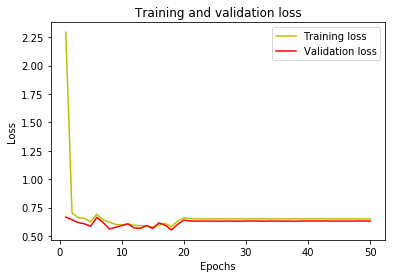

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

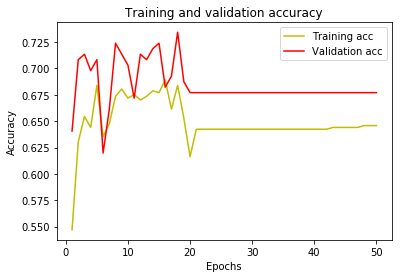

In [31]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
#예측값의 정확도 확인
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       0.68      1.00      0.81       130
          1       0.00      0.00      0.00        62

avg / total       0.46      0.68      0.55       192

[[130   0]
 [ 62   0]]


<h1>3. Regression Machine Learning (BMI)</h1>

In [33]:
#데이터셋 OutCome 삭제
df = df.drop('Outcome', axis = 1)

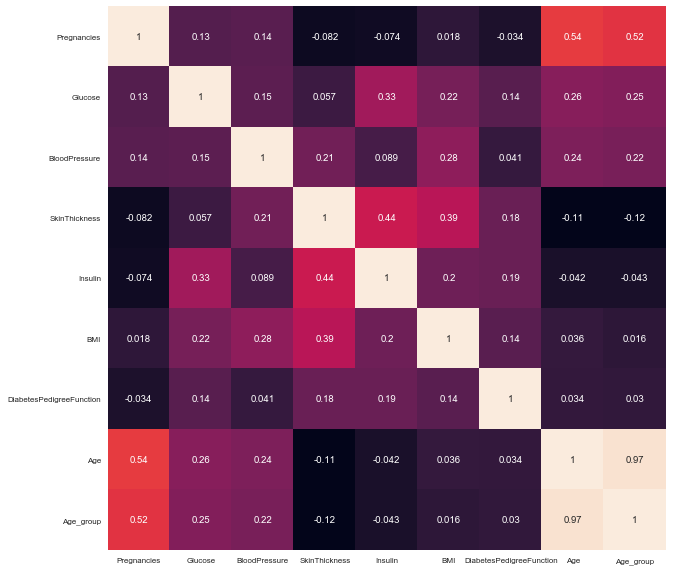

In [34]:
df_corr = df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()
#BMI와 관계가 높은 건 SkinThickness

In [35]:
X=df.drop('BMI', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Age_group
0,6,148,72,35,0,0.627,50,50
1,1,85,66,29,0,0.351,31,30
2,8,183,64,0,0,0.672,32,30
3,1,89,66,23,94,0.167,21,20
4,0,137,40,35,168,2.288,33,30


In [36]:
y = df['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


<h1 style="font-weight:normal"> Support vector machine(SVM) </h1>

In [55]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 50.55500485948164


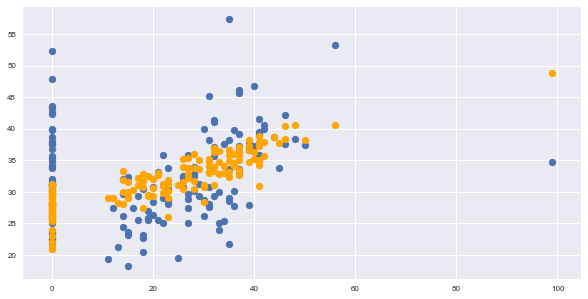

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show()    

<h1 style="font-weight:normal"> LinearRegression(LR) </h1>

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 51.640865532676116
평균제곱근오차 51.640865532676116
평균제곱근오차 51.64086553267613


In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()   

<h1 style="font-weight:normal"> RandomForest(RF) </h1>

In [42]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 48.96328766233767


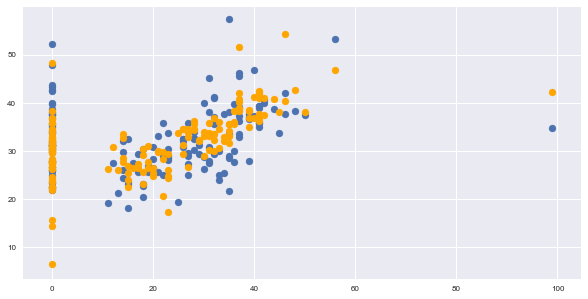

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show()         

<h1 style="font-weight:normal"> DecisionTree(DT) </h1>

In [44]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 85.11805194805194


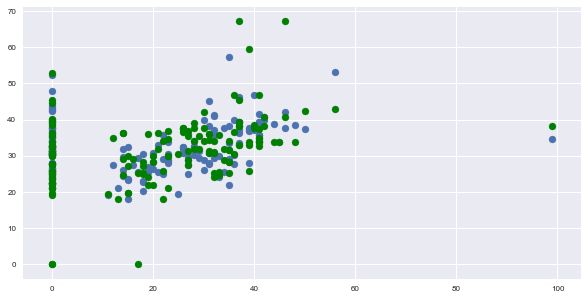

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], dy_preds, c='g', label='dy_preds')
plt.show()         

<h1 style="font-weight:normal">K-NearestNeighbor(KNN)</h1>

In [46]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# 모델 선택 (회귀 문제인 경우)
knn_model = KNeighborsRegressor(n_neighbors=5)

# 모델 학습
knn_model.fit(X_train, y_train)

# 예측 수행
y_pred = knn_model.predict(X_test)

# 성능 평가 (회귀 문제인 경우)
mse = mean_squared_error(y_test, y_pred)
print("평균제곱오차:", mse)

평균제곱오차: 45.27850909090909


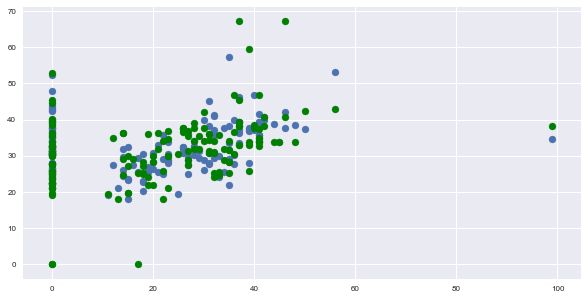

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], dy_preds, c='g', label='y_preds')
plt.show()    

<h1>4. Regression Deep Learning (BMI)</h1>

In [49]:
X = df.drop(['BMI'], axis = 1)
y = df['BMI']
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Age_group
762,9,89,62,0,0,0.142,33,30
127,1,118,58,36,94,0.261,23,20
564,0,91,80,0,0,0.601,27,20
375,12,140,82,43,325,0.528,58,50
663,9,145,80,46,130,0.637,40,40
144,4,154,62,31,284,0.237,23,20
268,0,102,52,0,0,0.078,21,20
21,8,99,84,0,0,0.388,50,50
609,1,111,62,13,182,0.138,23,20
511,0,139,62,17,210,0.207,21,20


In [51]:
y_test

661    42.9
122    33.6
113    34.0
14     25.8
529    24.6
103    26.6
338    34.2
588    33.3
395    27.7
204    37.7
31     31.6
546    43.6
278    24.9
593    28.5
737    32.0
202    27.3
175    32.7
55     23.0
479    28.0
365    34.0
417    38.5
577    42.9
172    28.9
352    34.4
27     23.2
605    35.8
239    18.4
744    40.6
79     25.0
496    26.0
       ... 
97     20.4
530    29.8
327    35.1
619    32.4
518    32.8
632    26.2
524    31.6
536    29.6
597    27.8
462    35.3
17     29.6
739    39.5
263    32.4
241    33.1
344    36.8
302    35.8
704    28.4
240    29.2
170    30.8
691    42.3
490    36.8
45     42.0
750    31.2
62     25.0
78     43.2
366    27.6
301    31.6
382    25.4
140    21.1
463    27.6
Name: BMI, Length: 192, dtype: float64

In [52]:
# 신경망 모델 구성
model = Sequential()

# 입력층과 은닉층
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

# 출력층 (회귀를 위한 출력)
model.add(Dense(1, activation='relu'))

# 모델 컴파일 (회귀 문제이므로 손실 함수는 mean_squared_error 사용)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 모델 요약 출력
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 3,361
Trainable params: 3,361
Non-trainable params: 0
____________________________________________________

In [53]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 테스트 데이터로 평가
test_loss, test_mae = model.evaluate(X_test, y_test)

Epoch 1/100
15/15 [==============================] - 0s 5ms/step - loss: 181.7484 - mae: 10.7958 - val_loss: 89.8862 - val_mae: 7.1414
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 72.2808 - mae: 6.5521 - val_loss: 72.8568 - val_mae: 6.3000
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 58.5735 - mae: 5.9694 - val_loss: 62.4633 - val_mae: 5.7540
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 55.9370 - mae: 5.7764 - val_loss: 65.2224 - val_mae: 5.8778
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 53.1189 - mae: 5.6427 - val_loss: 61.5727 - val_mae: 5.6693
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 50.9322 - mae: 5.4692 - val_loss: 63.5082 - val_mae: 5.7511
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 49.0151 - mae: 5.3260 - val_loss: 58.9422 - val_mae: 5.5344
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - 

In [54]:
print(f'Test MSE: {test_loss}')
print(f'Test MAE: {test_mae}')

Test MSE: 55.52851867675781
Test MAE: 5.56557035446167
